In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
## Checking missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

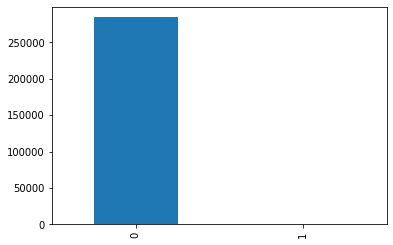

In [7]:
data['Class'].value_counts().plot(kind='bar')

In [8]:
## Splitting dependent features and independent features
x=data.drop('Class',axis=1)
y=data['Class']

In [9]:
## we can see that data is imbalanced let's perform over sampling
!pip install imblearn

In [10]:
from imblearn.over_sampling import RandomOverSampler
sampler=RandomOverSampler(sampling_strategy=0.5)
x_train,y_train=sampler.fit_resample(x,y)

In [11]:
from collections import Counter
print(f"Before Sampling {Counter(y)}")
print(f"After Sampling {Counter(y_train)}")

Before Sampling Counter({0: 284315, 1: 492})
After Sampling Counter({0: 284315, 1: 142157})


<AxesSubplot:>

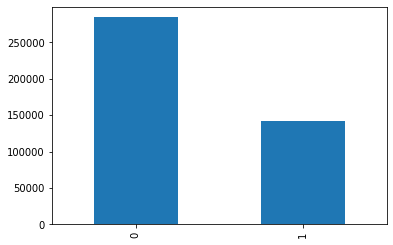

In [12]:
y_train.value_counts().plot(kind='bar')

Now  we can see that our data is sampled

In [13]:
## Train_Test Splitting
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [14]:
## Model Building 
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier()
cls.fit(X_train,Y_train)

RandomForestClassifier()

In [15]:
pred_random=cls.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(f"Accuracy of RandomForestCassifier is : {accuracy_score(Y_test,pred_random)}")

Accuracy of RandomForestCassifier is : 0.9999531039334076


In [17]:
print(confusion_matrix(Y_test,pred_random))

[[56773     4]
 [    0 28518]]


In [18]:
print(classification_report(Y_test,pred_random))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56777
           1       1.00      1.00      1.00     28518

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295



In [19]:
## Lets plot ROC Curve
from sklearn.metrics import roc_curve
pred_prob=cls.predict_proba(X_test)

In [20]:
pred_prob

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [21]:
pred_prob=pred_prob[:, 1] 
fpr,tpr,threshold=roc_curve(Y_test,pred_prob)

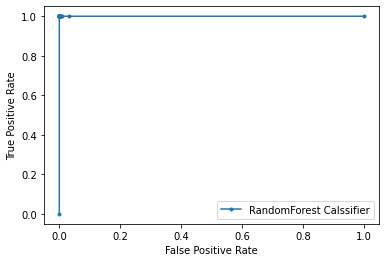

In [22]:
plt.plot(fpr,tpr,marker='.', label='RandomForest Calssifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import precision_recall_curve

In [24]:
precision,recall,threshold=precision_recall_curve(Y_test,pred_prob)

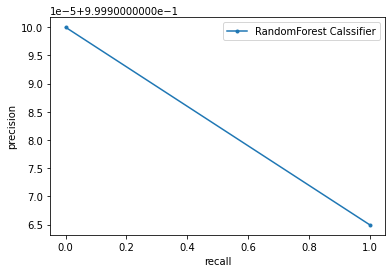

In [25]:
plt.plot(recall,precision,marker='.', label='RandomForest Calssifier')
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend()
plt.show()